In [1]:
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import signal
import numpy as np
import pandas as pd

In [37]:
cols = ["q", "I"]
data = pd.read_csv("teshi_xs",names=cols)

In [38]:
data

,q,I
0,0.0071,200901.4022
1,0.0072,175225.2432
2,0.0074,162112.5351
3,0.0078,152125.3787
4,0.0081,140467.8535
...,...,...
283,9.3705,0.6161
284,9.5637,0.5133
285,9.8091,0.6553
286,9.8958,0.8730


In [106]:
def power_law(x,p,B):
    return B*np.power(x,-p)

[2.35459031 1.64493026]


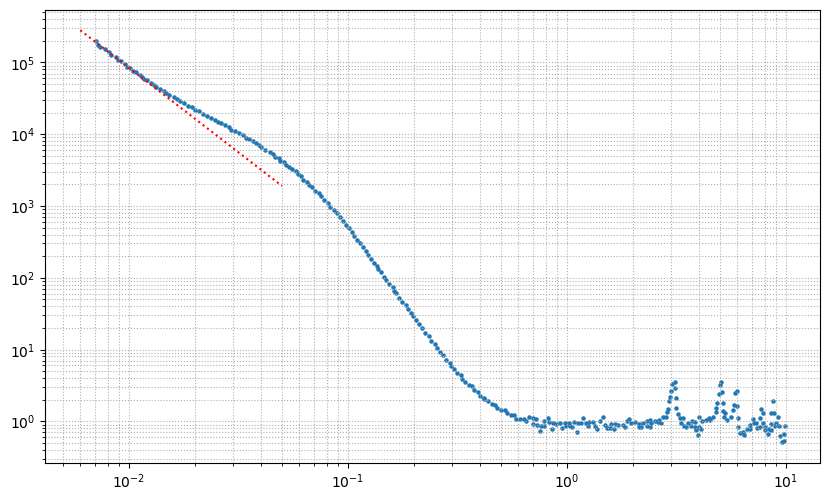

In [107]:
fig, ax = plt.subplots(1,1, figsize=(10, 6), dpi=100)
mask_fit_PL = (data["q"]<1e-2)
popt,pcov = curve_fit(power_law,
                      data["q"][mask_fit_PL],
                      data["I"][mask_fit_PL],
                      p0=[1,1e5])
perr = np.sqrt(np.diag(pcov))

plt.scatter(data["q"],data["I"],s=5)

x_fit = [x for x in np.linspace(6e-3,5e-2,100)]
y_fit=[power_law(x,*popt) for x in x_fit]
plt.plot(x_fit,y_fit, c="r", ls=":")
plt.grid(ls=":",which="both")
plt.xscale("log")
plt.yscale("log")
print(popt)

In [108]:
def Guinier(x,A,s,rg,b):
    return  A*np.power(x,-s)*np.exp((-x**2*rg**2)/(3-s)) + b

In [109]:
p=2.3
s=3.005
rg=5.1
b=1
q1 = 1/rg*np.sqrt((p-s)*(3-s)/2)
B = np.power(q1,p-s)*np.exp((-q1**2*rg**2)/(3-s))
print(q1,B)

0.008231791972424749 41.94355742791476


[5.76626206e+00 2.07208321e+00 2.49489572e-04 2.56536412e+03]


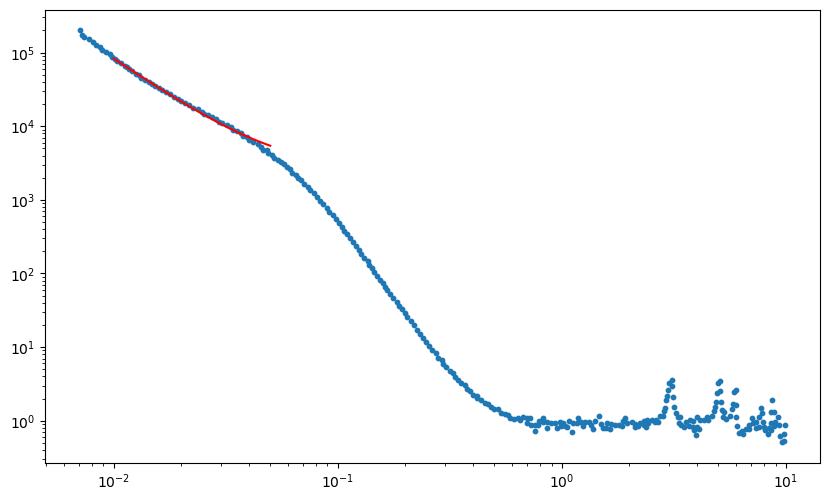

In [119]:
fig, ax = plt.subplots(1,1, figsize=(10, 6), dpi=100)
mask_fit_guinier = (data["q"]<0.05) & (data["q"]>0.01)
popt,pcov = curve_fit(Guinier,
                      data["q"][mask_fit_guinier],
                      data["I"][mask_fit_guinier],
                      p0=[1e5,1.6,12,1])
perr = np.sqrt(np.diag(pcov))

plt.scatter(data["q"],data["I"],s=10)

x_fit = [x for x in np.linspace(1e-2,5e-2,100)]
y_fit=[Guinier(x,*popt) for x in x_fit]
plt.plot(x_fit,y_fit, c="r")
plt.xscale("log")
plt.yscale("log")
print(popt)

In [286]:
def power_lawANDGuinier(x,A,s,rg,p,b):
    result = x.copy()
    q1 = 1/rg*np.sqrt((p-s)*(3-s)/2)
    B = np.power(q1,p-s)*np.exp((-q1**2*rg**2)/(3-s))
    mask = result>q1
    result[mask] = np.power(x,-s)*np.exp((-x**2*rg**2)/(3-s))
    result[np.invert(mask)] = B*np.power(x,-p)
    return A*result+b

[77.93762904  1.31916435 17.6847945   2.1901575   0.99999543]


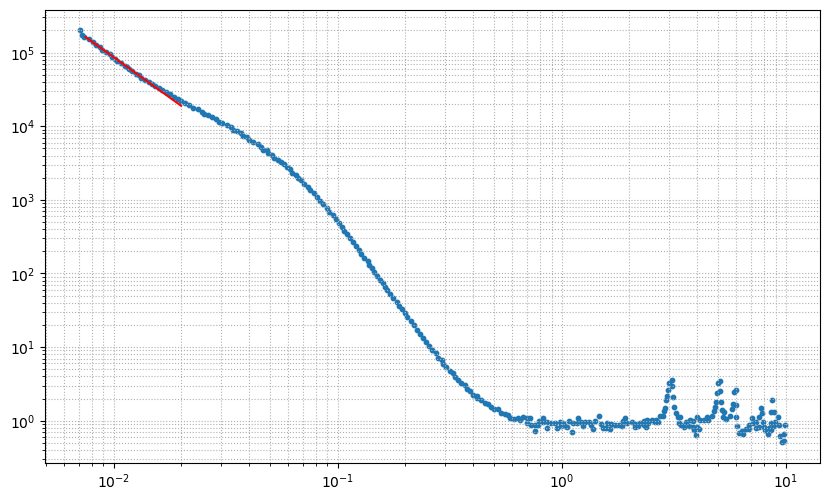

In [299]:
fig, ax = plt.subplots(1,1, figsize=(10, 6), dpi=100)
mask_fit_porod = (data["q"]>0.0075) & (data["q"]<0.02)
popt,pcov = curve_fit(power_lawANDGuinier,
                      data["q"][mask_fit_porod],
                      data["I"][mask_fit_porod], 
                      p0=[1e2,1.4,16,3,0],
                      bounds=((0, 1, 0, 2,0), (np.inf,np.inf,20, 4,1)))
perr = np.sqrt(np.diag(pcov))
print(popt)
plt.scatter(data["q"],data["I"],s=10)

x_fit = [x for x in np.linspace(0.0075,0.02,1000)]
y_fit=power_lawANDGuinier(pd.Series(x_fit),*popt)
plt.plot(x_fit,y_fit, c="r")
plt.xscale("log")
plt.yscale("log")
plt.grid(ls=":",which="both")

In [137]:
def Porod(x,A,m,b):
    return A*np.power(x,-m) + b

[4.39077172e-02 4.05510345e+00 2.92414957e-13]


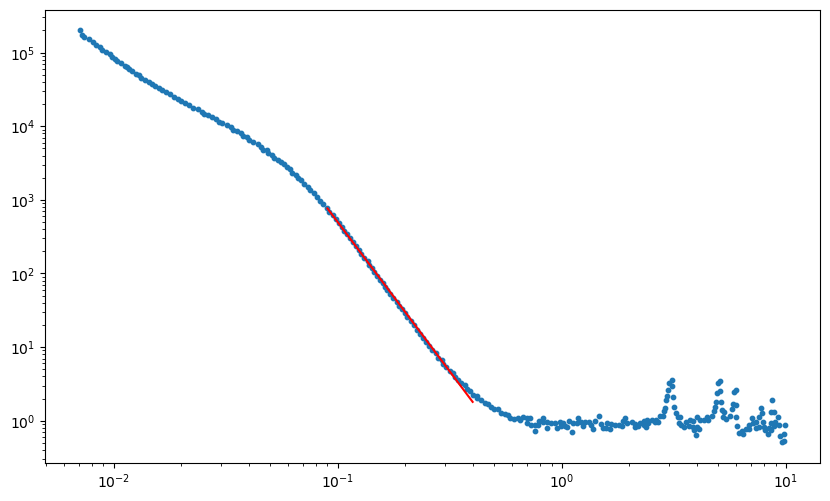

In [139]:
fig, ax = plt.subplots(1,1, figsize=(10, 6), dpi=100)
mask_fit_porod = (data["q"]>0.09) & (data["q"]<0.4)
popt,pcov = curve_fit(Porod,
                      data["q"][mask_fit_porod],
                      data["I"][mask_fit_porod], 
                      p0=[1,4,0],
                      bounds=((-np.inf, -np.inf, 0), (np.inf, np.inf, np.inf)))
perr = np.sqrt(np.diag(pcov))

plt.scatter(data["q"],data["I"],s=10)

x_fit = [x for x in np.linspace(9e-2,4e-1,100)]
y_fit=[Porod(x,*popt) for x in x_fit]
plt.plot(x_fit,y_fit, c="r")
plt.xscale("log")
plt.yscale("log")
print(popt)

In [367]:
def GuinierANDPorod(x,A,s,rg,m):
        result=x.copy()
        q2 = 1.0/rg*np.sqrt((m-s)*(3-s)/2)
        B = np.power(q2,m-s)*np.exp((-q2**2*rg**2)/(3-s))
        mask = result<q2
        result[mask] = np.power(x,-s)*np.exp((-x**2*rg**2)/(3-s))
        result[np.invert(mask)] = B*np.power(x,-m)
        return A*result

[67.4784505   1.49870265 14.73173127  4.12349246]


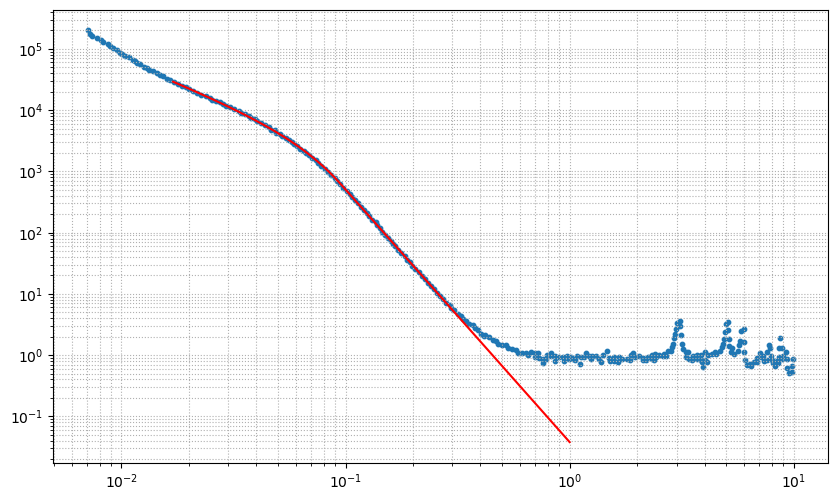

In [370]:
fig, ax = plt.subplots(1,1, figsize=(10, 6), dpi=100)
mask_fit_guinierANDporod = (data["q"]>0.017) & (data["q"]<0.3)
popt,pcov = curve_fit(GuinierANDPorod,
                      data["q"][mask_fit_guinierANDporod],
                      data["I"][mask_fit_guinierANDporod], 
                      p0=[1e2,1.4,16,3.7],
                      bounds=((0, 1, 0, 3), (np.inf,np.inf,20, 10)))
perr = np.sqrt(np.diag(pcov))
print(popt)
plt.scatter(data["q"],data["I"],s=10)

x_fit = [x for x in np.linspace(1.7e-2,1,1000)]
y_fit=GuinierANDPorod(pd.Series(x_fit),*popt)
plt.plot(x_fit,y_fit, c="r")
plt.xscale("log")
plt.yscale("log")
plt.grid(ls=":",which="both")

[67.4784505   1.49870265 14.73173127  4.12349246]
[2.22679943 3.0340199 ]


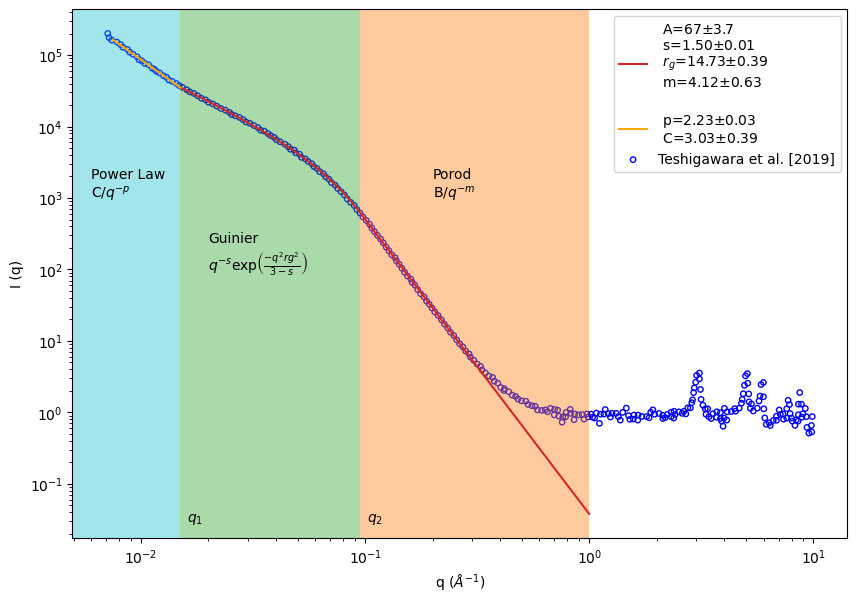

In [427]:
fig, ax = plt.subplots(1,1, figsize=(10, 7), dpi=100)
q1=0.015
mask_fit_PL = (data["q"]>0.0075) & (data["q"]<0.017)
mask_fit_guinierANDporod = (data["q"]>0.017) & (data["q"]<0.3)

popt,pcov = curve_fit(GuinierANDPorod,
                      data["q"][mask_fit_guinierANDporod],
                      data["I"][mask_fit_guinierANDporod], 
                      p0=[1e2,1.4,16,3.7],
                      bounds=((0, 1, 0, 3),(np.inf,np.inf,20, 10))
                          )
perr = np.sqrt(np.diag(pcov))
print(popt)
popt2,pcov2 = curve_fit(power_law,
                      data["q"][mask_fit_PL],
                      data["I"][mask_fit_PL], 
                      p0=[2.35459031,1.64493026])
                      #bounds=((0, 1, 0, 2,0), (np.inf,np.inf,20, 4,1)))
perr2 = np.sqrt(np.diag(pcov2))
print(popt2)

plt.scatter(data["q"],data["I"],s=15,facecolors='none',edgecolors="b",label="Teshigawara et al. [2019]")

x_fit = [x for x in np.linspace(q1,1,1000)]
y_fit=GuinierANDPorod(pd.Series(x_fit),*popt)
x_fit2 =[x for x in np.linspace(0.0075,q1,100)]
y_fit2=power_law(pd.Series(x_fit2),*popt2)

label_string_GP = f" A={popt[0]:.0f}$\pm${perr[0]:.1f}\n s={popt[1]:.2f}$\pm${perr[1]:.2f}\n $r_g$={popt[2]:.2f}$\pm${perr[2]:.2f}\n m={popt[3]:.2f}$\pm${perr[3]:.2f}\n"
label_string_pl = f" p={popt2[0]:.2f}$\pm${perr2[0]:.2f}\n C={popt2[1]:.2f}$\pm${perr2[1]:.2f}"

#Graphical decorators
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
#plt.vlines(q1,ymin,ymax)
ax.annotate(r'$q_1$', 
            xy=(0.016,0.03)
            )
ax.annotate('Power Law\n'+r'C/$q^{-p}$', 
            xy=(0.006,1e3)
            )
plt.axvspan(xmin,q1, facecolor='tab:cyan', alpha=0.4)
q2 = 1.0/popt[2]*np.sqrt((popt[3]-popt[1])*(3-popt[1])/2)
#plt.vlines(q2,ymin,ymax)
ax.annotate("Guinier\n"+r"$q^{-s}\exp\left(\frac{-q^2rg^2}{3-s}\right)$", 
            xy=(0.02,1e2)
            )
ax.annotate(f'$q_2$', 
            xy=(q2+0.007,0.03)
            )
plt.axvspan(q1,q2, facecolor='tab:green', alpha=0.4)
plt.axvspan(q2,1, facecolor='tab:orange', alpha=0.4)
ax.annotate('Porod\n'+r'B/$q^{-m}$', 
            xy=(0.2,1e3)
            )


plt.plot(x_fit,y_fit, c="tab:red", label=label_string_GP)
plt.plot(x_fit2,y_fit2, c="orange", label=label_string_pl)

plt.legend()
plt.xscale("log")
plt.xlabel("q ($Å^{-1}$)")
plt.ylabel("I (q)")
plt.yscale("log")
#plt.grid(ls=":",which="both")
plt.show()

In [305]:
def GuinierANDPorodANDpl(x,A,p,s,rg,m,b):
        result=x.copy()
        q1 = 1.0/rg*np.sqrt((p-s)*(3-s)/2)
        q2 = 1.0/rg*np.sqrt((m-s)*(3-s)/2)
        C = np.power(q1,p-s)*np.exp((-q2**2*rg**2)/(3-s))
        B = np.power(q2,m-s)*np.exp((-q2**2*rg**2)/(3-s))
        mask1 = result>q1
        mask2 = (result<q2)&(result>q1)
        mask3 = result>q2
        result[mask1] = C*np.power(x,-p)
        result[mask2] = np.power(x,-s)*np.exp((-x**2*rg**2)/(3-s))
        result[mask3] = B*np.power(x,-m)
        return A*result+b

[143.97789571   2.23         1.2762783   17.77737109   3.7828248
   2.        ]


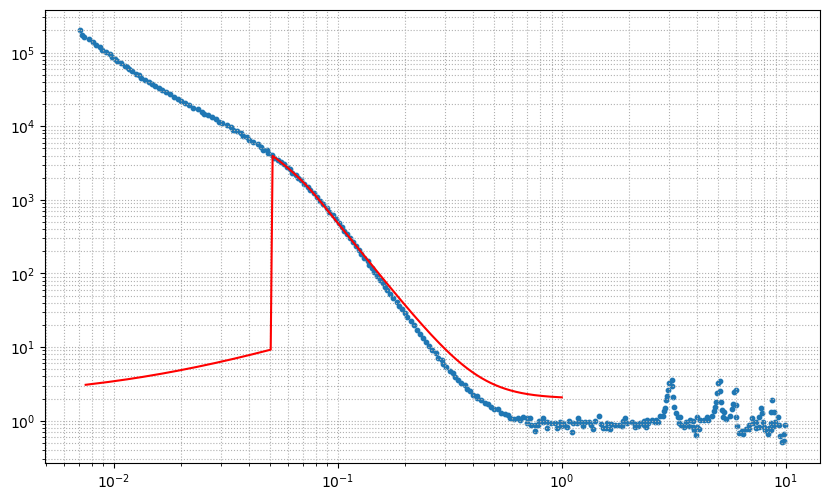

In [365]:
fig, ax = plt.subplots(1,1, figsize=(10, 6), dpi=100)
mask_fit_porod = (data["q"]>0.0075) & (data["q"]<0.3)
popt,pcov = curve_fit(GuinierANDPorodANDpl,
                      data["q"][mask_fit_porod],
                      data["I"][mask_fit_porod], 
                      p0=[67,2.23,1.5,14.74,4.14,0.85],
                      bounds=((0, 2,1, 0, 3, 0.85),(np.inf,3,np.inf,20, 10,2)))
perr = np.sqrt(np.diag(pcov))
print(popt)
plt.scatter(data["q"],data["I"],s=10)

x_fit = [x for x in np.linspace(0.0075,1,1000)]
y_fit=GuinierANDPorodANDpl(pd.Series(x_fit),*popt)
plt.plot(x_fit,y_fit, c="r")
plt.xscale("log")
plt.yscale("log")
plt.grid(ls=":",which="both")